In [2]:
#Author: Vishal Chalia
#Purpose: Explanatory Data Analysis of the Global Terrorism Database (GTD)

In [3]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Executive Summary
This project used Global Terrorism Database (GTD) to deliver pratical information to an international security consultancy.

The study provides information based on global trends, regional hotspots, attack styles, target choices, and group activity, which supports counter-terrorism, humanitarian planning, andpolicy-makers.

The results point to zonesand populations that need to immediate focus, unveil evolving patterns of lethality, and propose the steps to better preparedness and allocation of security resources.


#Business Context
Our client the International Security Analysis Consultancy (ISAC) provides advisory services to governments, NGOs and multinational organizations on worldwide security threats.

They need a detailed research of the Global Terrorism Database (GTD), which is one of the largest datasets on the terrorist attacks across the globe.

The consultancy aims to recognize long-term tendencies, regional patterns, and tactical infights to enhance the counter-terrorism policy, allocating in the most efficient way and predicting the emergent threats.

#Data Loading & Exploration

In [4]:
#Load Data
Data_Path = '/content/drive/MyDrive/AI Datasets/(1Project)_globalterrorismdb_0522dist.csv'

cols = ["iyear","imonth","iday","country_txt","region_txt","city",
        "attacktype1_txt","targtype1_txt","gname","nkill","nwound"]

df_org = pd.read_csv(Data_Path, usecols = cols)

#Preview
df_org.head()

,iyear,imonth,iday,country_txt,region_txt,city,attacktype1_txt,targtype1_txt,gname,nkill,nwound
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,Assassination,Private Citizens & Property,MANO-D,1.0,0.0
1,1970,0,0,Mexico,North America,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,0.0,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,Assassination,Journalists & Media,Unknown,1.0,0.0
3,1970,1,0,Greece,Western Europe,Athens,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,NaN


#Data Preprocessing

In [5]:
#clean numeric columns
df = df_org.copy()

for c in ["nkill","nwound"]:
  df[c] = pd.to_numeric(df[c], errors = "coerce").fillna(0)

#handle missing values
df["gname"] = df["gname"].fillna("Unknown")

#total casualties
df["casualties"] = df["nkill"] + df["nwound"]

#rename for consistency
df = df.rename(columns={"iyear":"year","imonth":"month"})

#preview
df.head()

,year,month,iday,country_txt,region_txt,city,attacktype1_txt,targtype1_txt,gname,nkill,nwound,casualties
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,Assassination,Private Citizens & Property,MANO-D,1.0,0.0,1.0
1,1970,0,0,Mexico,North America,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,0.0,0.0,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,Assassination,Journalists & Media,Unknown,1.0,0.0,1.0
3,1970,1,0,Greece,Western Europe,Athens,Bombing/Explosion,Government (Diplomatic),Unknown,0.0,0.0,0.0
4,1970,1,0,Japan,East Asia,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,0.0,0.0,0.0


#Exploratory Data Analysis (EDA)

Flow: Why → Code → Visualisation → Interpretation



```
# This is formatted as code
```

Q1: Key trends over time.

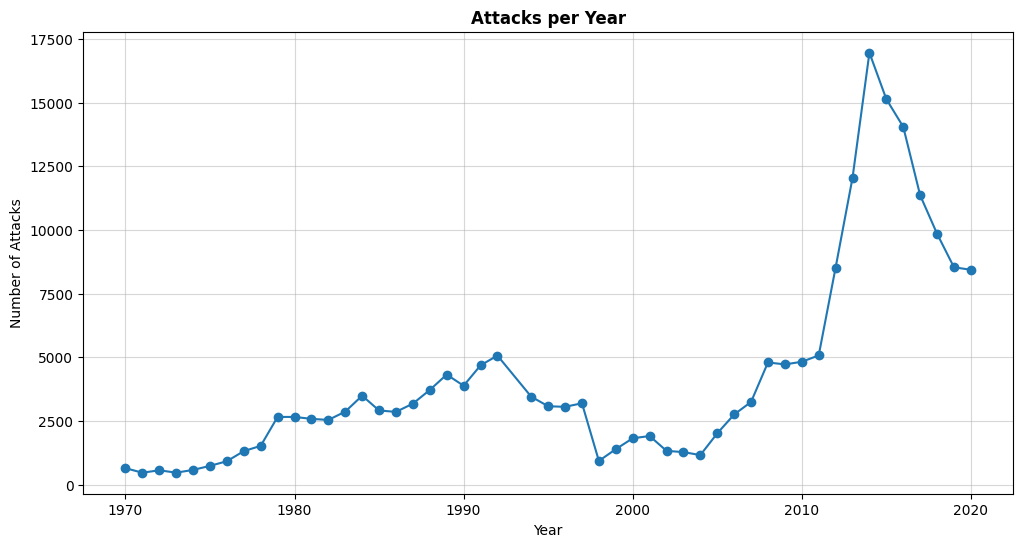

In [6]:
attacks_per_year = df.groupby("year").size()

#plot
plt.figure(figsize = (12,6))
plt.plot(attacks_per_year.index, attacks_per_year.values, marker = "o")
plt.xlabel ("Year")
plt.ylabel ("Number of Attacks")
plt.title ("Attacks per Year", weight = "bold")
plt.grid (True, alpha = 0.5)
plt.show()

#Interpretation:
Peaks are associated with wars and conflicts (e.g.,Iraq, Afghanistan). Long-term increase observed until mid-2010s.

Q2: Regional Hotspots

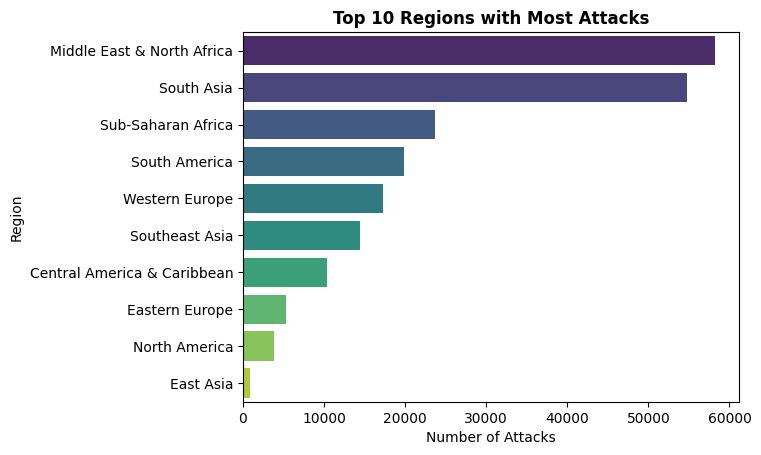

In [7]:
regional_counts = df['region_txt'].value_counts().head(10)

#plot
sns.barplot(x = regional_counts.values, y = regional_counts.index,
            hue = regional_counts.index, legend = False, palette = "viridis")
plt.xlabel ("Number of Attacks")
plt.ylabel ("Region")
plt.title ("Top 10 Regions with Most Attacks", weight = "bold")
#plt.grid (True, alpha = 0.5)
plt.show()

#Interpretation:
The areas that has received the greatest number of attacks is the Middle East & North Africa and then the South Asia.

Q3: Attack Methods

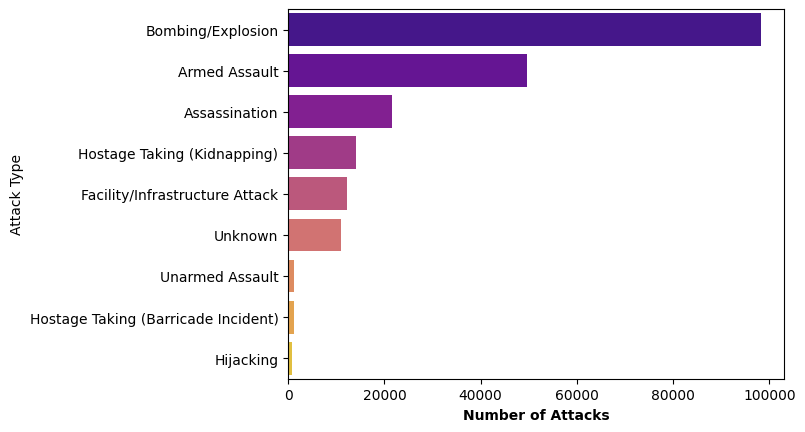

In [8]:
attack_counts = df['attacktype1_txt'].value_counts()

#plot
sns.barplot(x = attack_counts.values, y = attack_counts.index,
            hue = attack_counts.index, legend = False, palette = "plasma")
plt.xlabel ("Number of Attacks", weight = "bold")
plt.ylabel ("Attack Type")
#plt.grid (True, alpha = 0.5)
plt.show()

#Interpretation:
Bombings/Explosions dominate, followed by Armed Assualts.

Q4: Tagrget Profiles

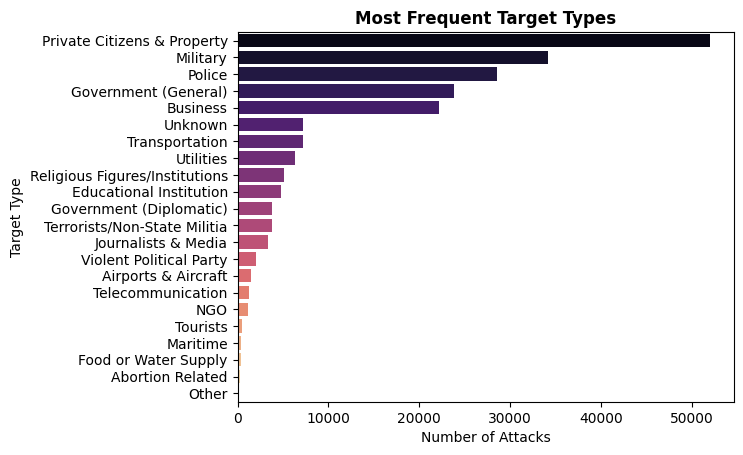

In [9]:
target_profiles = df['targtype1_txt'].value_counts()

#plot
sns.barplot(x = target_profiles.values, y = target_profiles.index,
            hue = target_profiles.index, legend = False, palette = "magma")
plt.xlabel ("Number of Attacks")
plt.ylabel ("Target Type")
plt.title ("Most Frequent Target Types", weight = "bold")
#plt.grid (True, alpha = 0.5)
plt.show()

Q5: Deadliest Countires

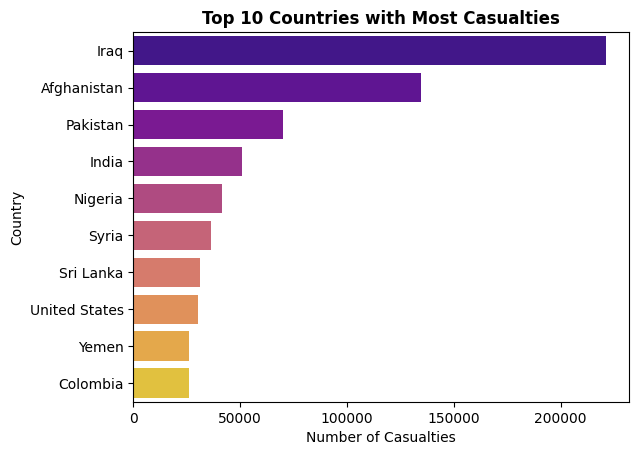

In [10]:
casualties_by_country = df.groupby(
    "country_txt")["casualties"].sum().sort_values(ascending = False).head(10)

#plot
sns.barplot(x = casualties_by_country.values, y = casualties_by_country.index,
            hue = casualties_by_country.index, legend = False, palette = "plasma")
plt.title ("Top 10 Countries with Most Casualties", weight = "bold")
plt.xlabel ("Number of Casualties")
plt.ylabel ("Country")
#plt.grid (True, alpha = 0.5)
plt.show()

Q6: Most Active Groups

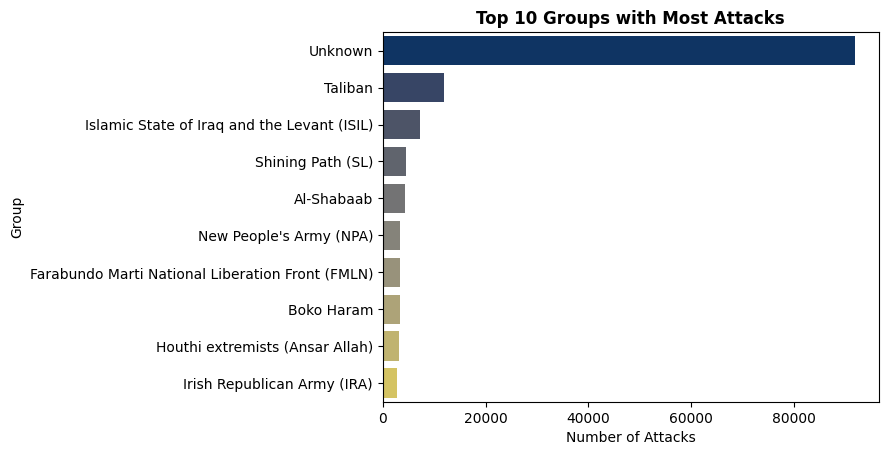

In [11]:
group_counts = df['gname'].value_counts().head(10)

#plot
sns.barplot(x = group_counts.values, y = group_counts.index,
            hue = group_counts.index, legend = False, palette = "cividis")
plt.xlabel ("Number of Attacks")
plt.ylabel ("Group")
plt.title ("Top 10 Groups with Most Attacks", weight = "bold")
#plt.grid (True, alpha = 0.5)
plt.show()

Q7: Seasonality

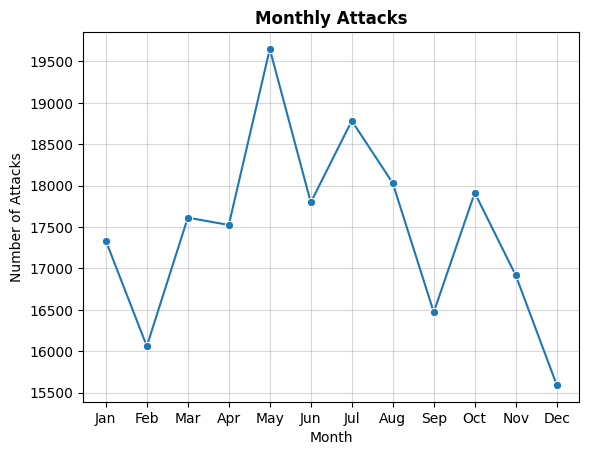

In [12]:
monthly = df[df["month"].between (1,12)].groupby ("month").size()

#plot
sns.lineplot (x = monthly.index, y = monthly.values, marker = "o")
plt.xticks (range(1,13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul",
                          "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.xlabel ("Month")
plt.ylabel ("Number of Attacks")
plt.title ("Monthly Attacks", weight = "bold")
plt.grid (True, alpha = 0.5)
plt.show()

Q8: Lethality Trends

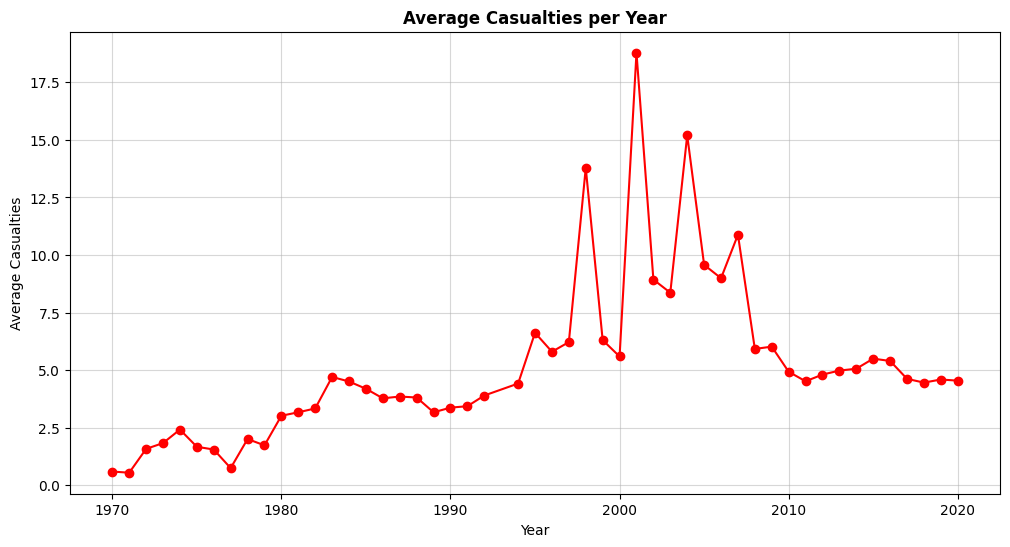

In [13]:
avg_casualties_per_year = df.groupby ("year")["casualties"].mean()

#plot
plt.figure(figsize = (12,6))
plt.plot (avg_casualties_per_year.index, avg_casualties_per_year.values,
          marker = "o", color = "red")
plt.xlabel ("Year")
plt.ylabel ("Average Casualties")
plt.title ("Average Casualties per Year", weight = "bold")
plt.grid (True, alpha = 0.5)
plt.show()

Q9: Attack Type vs Target

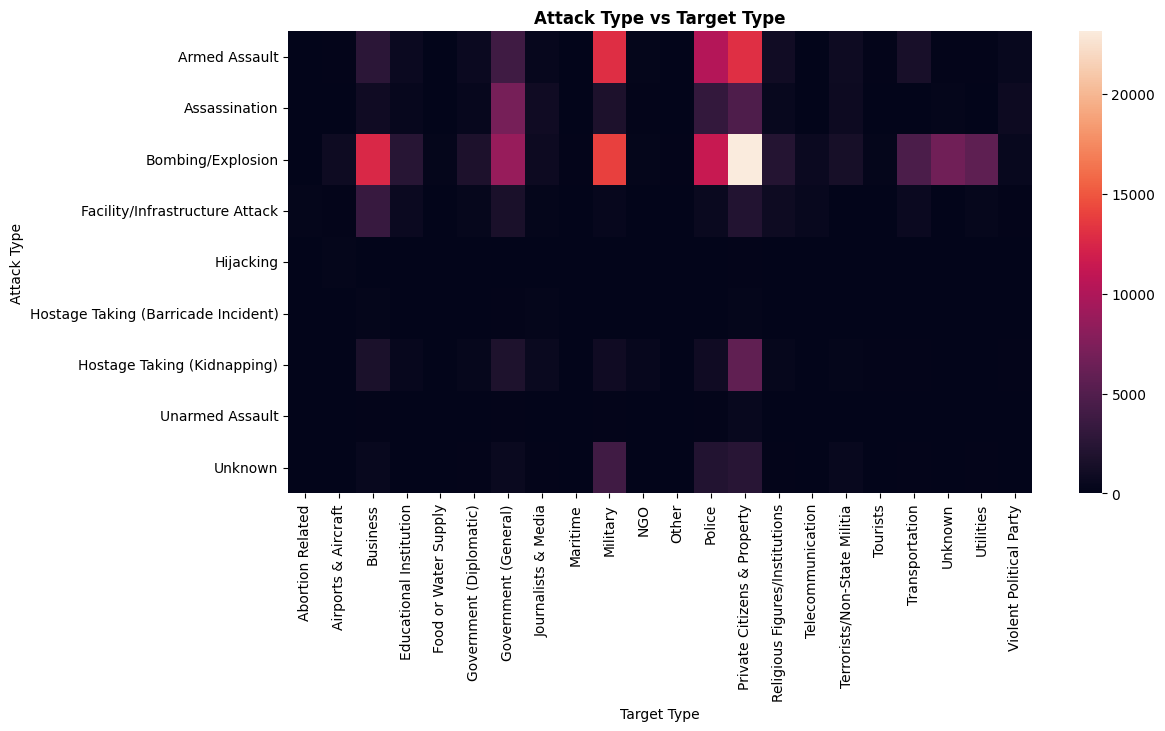

In [14]:
ct = pd.crosstab(df["attacktype1_txt"], df["targtype1_txt"])

#plot
plt.figure(figsize = (12,6))
sns.heatmap(ct, cbar=True)
plt.title ("Attack Type vs Target Type", weight = "bold")
plt.xlabel ("Target Type")
plt.ylabel ("Attack Type")
plt.show()

Q10: Casualty Distribution

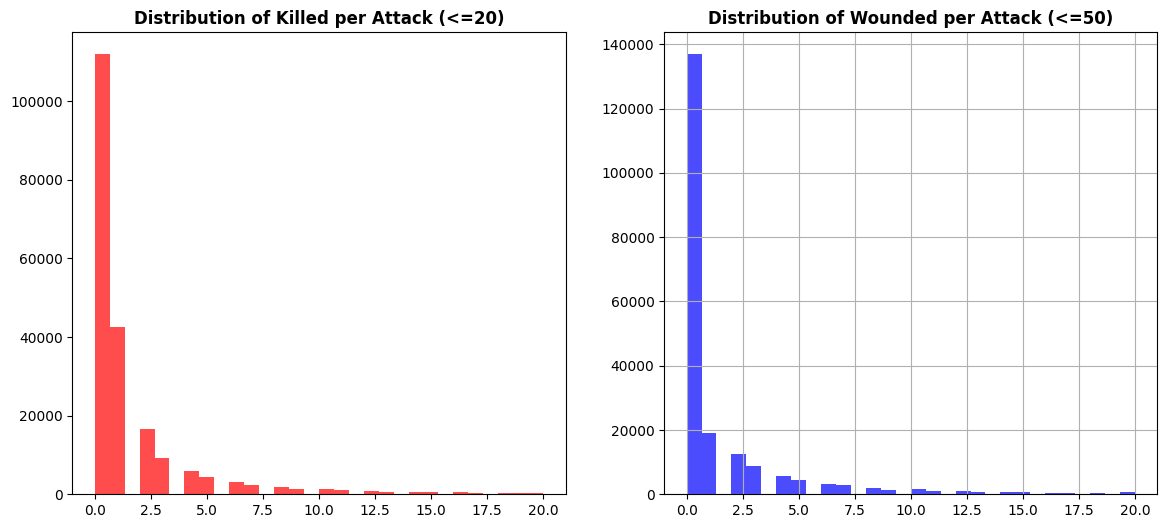

In [15]:
fig, ax = plt.subplots (1,2, figsize = (14,6))
plt.grid (True, alpha = 1)
ax [0].hist (df ["nkill"], bins=30, range=(0,20), color="red", alpha = 0.7)
ax[0].set_title("Distribution of Killed per Attack (<=20)", weight = "bold")

ax [1].hist (df ["nwound"], bins=30, range=(0,20), color="blue", alpha = 0.7)
ax[1].set_title("Distribution of Wounded per Attack (<=50)", weight = "bold")

#plt.grid (True, alpha = 1)
plt.show()

#Final Discussion

**Strenghts**
- Deep, decades-long data that is globally representative.

**Limitations**
- Reporting bias, high number of perpetrators of which are unknown, missing data.

**Trends**
- Terrorism was in its highest in 2014, with its focus on Middle East and South Asia. Bombings taking center stage; civilians are the major targets.

**Recommendations**
1. Give emphasis to high-risk areas and populations.
2. Invest in civilian defense and explosive locating devices.
3. Follow seasonal and lethality trends and direct preparedness.
4. Combine GTD with socio-economic data for deeper analysis.

In [ ]:
#@title Convert ipynb to HTML in Colab
# Upload ipynb
from google.colab import files
f = files.upload()

# Convert ipynb to html
import subprocess
file0 = list(f.keys())[0]
_ = subprocess.run(["pip", "install", "nbconvert"])
_ = subprocess.run(["jupyter", "nbconvert", file0, "--to", "html"])

# download the html
files.download(file0[:-5]+"html")